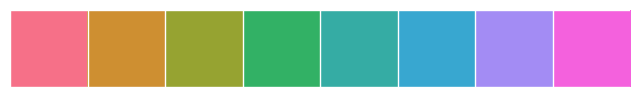

In [1]:
import pandas as pd
import numpy as np
from __future__ import division
import calendar
import time
import datetime
from datetime import date, timedelta
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from dateutil.parser import parse
colorz=sns.color_palette("husl", 8)
sns.palplot(sns.color_palette("husl", 8))

In [2]:
# INDOOR DATA
ildsa=pd.read_excel('/Users/stella/Desktop/data/realeco_queens-college-aqindoor_2017-01-04t195400_2017-03-01t195400.xlsx',
                     sheetname=0).set_index('time')
ipm25=pd.read_excel('/Users/stella/Desktop/data/realeco_queens-college-aqindoor_2017-01-04t195400_2017-03-01t195400.xlsx',
                     sheetname=1).set_index('time')
ipn=pd.read_excel('/Users/stella/Desktop/data/realeco_queens-college-aqindoor_2017-01-04t195400_2017-03-01t195400.xlsx',
                     sheetname=2).set_index('time')
indoor=(ildsa.join(ipm25)).join(ipn).reset_index()
indoor=indoor.rename(index=str, columns={'time':'Datetime',
                                         'value (µm²/cm³)':'ldsa (um2/cm3)',
                                         'value (µg/m³)':'pm25 (ug/m3)',
                                         'value (1/cm³)':'pn (P/cm3)'})

In [3]:
# URBAN DATA
urban=pd.read_csv('/Users/stella/Desktop/data/1329_PEGASOR A_20170316200803_v2.csv')

In [4]:
urban['DateTime']=urban['DateTime'].apply(lambda x: parse(x))

In [5]:
urban=urban.rename(columns={'MEASURE_PA_LABEL':'LDSA (um2/cm3)',
                      'MEASURE_MG_LABEL':'PN (#/cm3)',
                      'MEASURE_N_LABEL':'PM2.5 (ug/m3)',
                      'MEASURE_PA_LABEL.1':'LDSA-1 (um2/cm3)',
                      'MEASURE_MG_LABEL.1':'PN-1 (#/cm3)',
                      'MEASURE_N_LABEL.1':'PM2.5-1 (ug/m3)',
                      'MEASURE_PA_LABEL.2':'LDSA-2 (um2/cm3)',
                      'MEASURE_MG_LABEL.2':'PN-2 (#/cm3)',
                      'MEASURE_N_LABEL.2':'PM2.5-2 (ug/m3)'
                     })

In [7]:
urb=urban.copy(False)

In [9]:
del urb['PN (#/cm3)'],urb['PN-1 (#/cm3)'],urb['PN-2 (#/cm3)']

In [19]:
urb=urb[urb['LDSA (um2/cm3)']>0]
urb=urb[urb['LDSA-1 (um2/cm3)']>0]
urb=urb[urb['LDSA-2 (um2/cm3)']>0]

In [44]:
urb.tail()

,DateTime,LDSA (um2/cm3),PM2.5 (ug/m3),LDSA-1 (um2/cm3),PM2.5-1 (ug/m3),LDSA-2 (um2/cm3),PM2.5-2 (ug/m3)
82316,2017-03-02 23:56:00,4.761,0.187,6.039,0.187,6.050,0.243
82317,2017-03-02 23:57:00,4.761,0.187,5.898,0.183,5.708,0.229
82318,2017-03-02 23:58:00,4.761,0.187,5.898,0.183,5.708,0.229
82319,2017-03-02 23:59:00,4.761,0.187,5.881,0.182,4.826,0.194
82320,2017-03-03 00:00:00,4.761,0.187,5.881,0.182,4.826,0.194


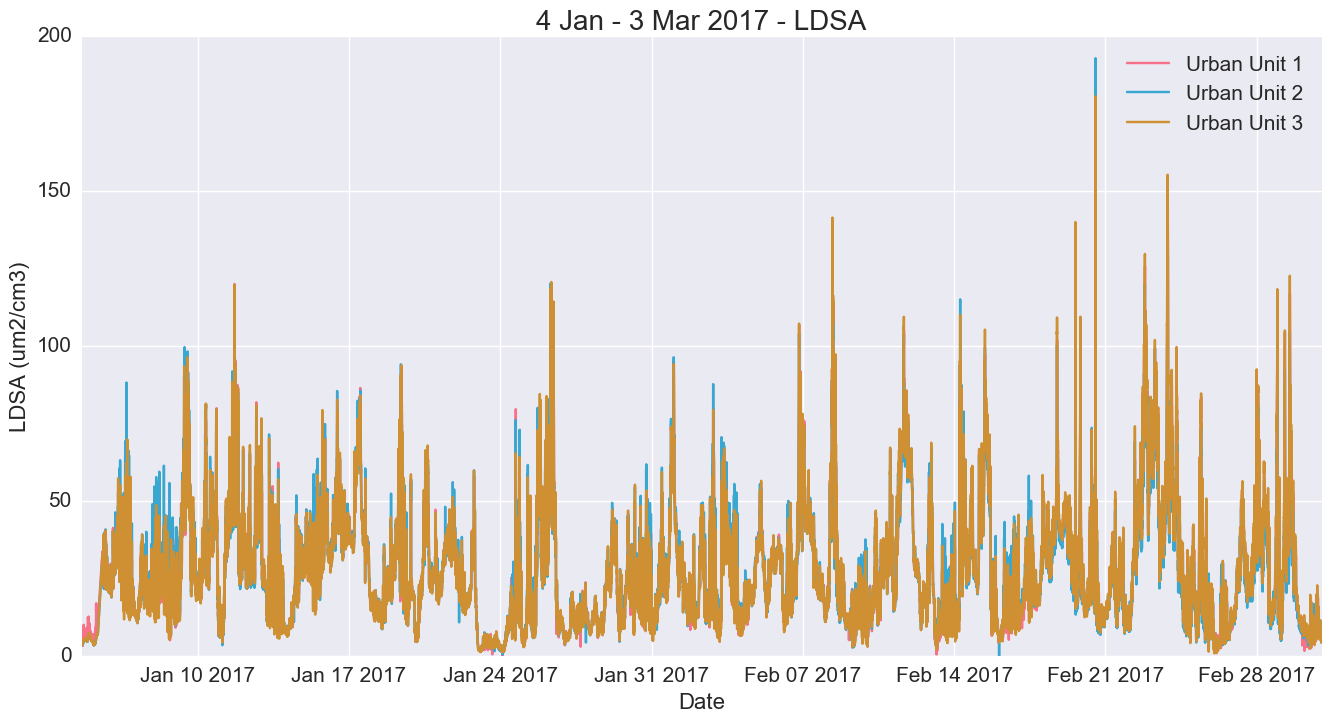

In [66]:
plt.figure(figsize=(16,8))
plt.title('4 Jan - 3 Mar 2017 - LDSA',fontsize=20)
plt.xlabel('Date',fontsize=16)
plt.ylabel('LDSA (um2/cm3)',fontsize=16)
plt.plot(urb['DateTime'],urb['LDSA (um2/cm3)'],label='Urban Unit 1',color=colorz[0])
plt.plot(urb['DateTime'],urb['LDSA-1 (um2/cm3)'],label='Urban Unit 2',color=colorz[5])
plt.plot(urb['DateTime'],urb['LDSA-2 (um2/cm3)'],label='Urban Unit 3',color=colorz[1])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)

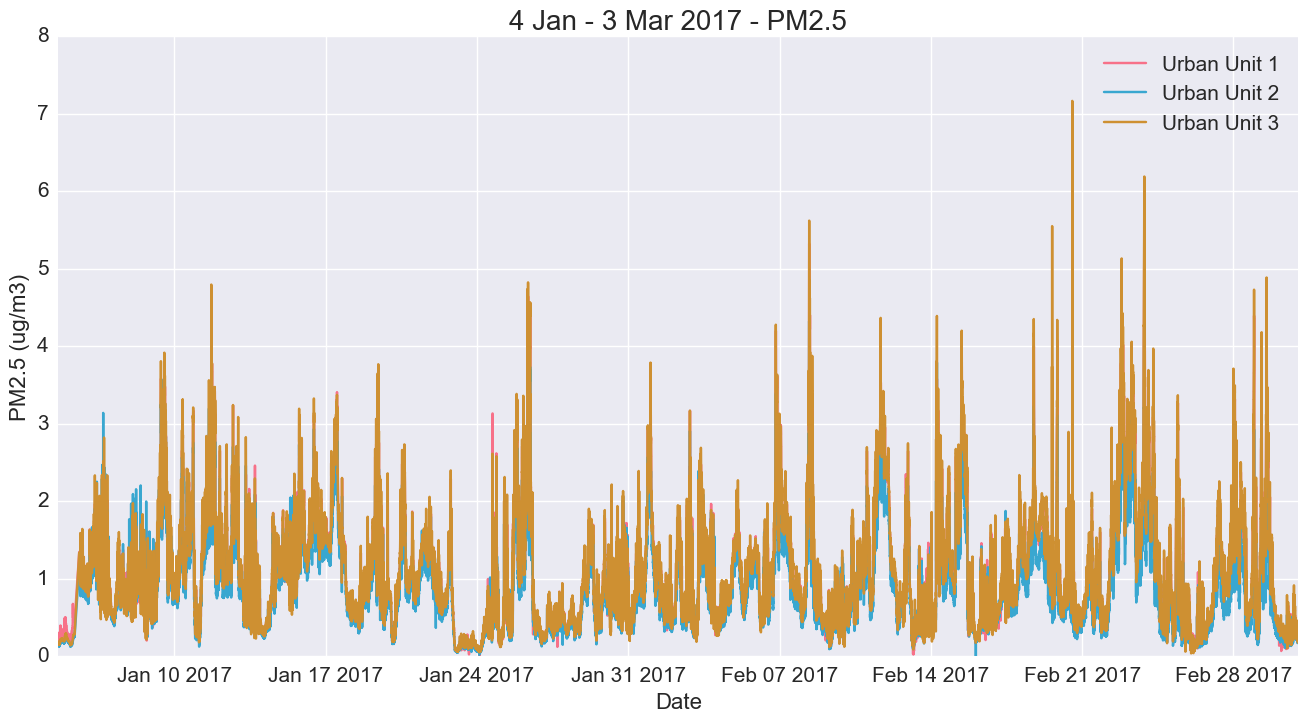

In [67]:
plt.figure(figsize=(16,8))
plt.title('4 Jan - 3 Mar 2017 - PM2.5',fontsize=20)
plt.xlabel('Date',fontsize=16)
plt.ylabel('PM2.5 (ug/m3)',fontsize=16)
plt.plot(urb['DateTime'],urb['PM2.5 (ug/m3)'],label='Urban Unit 1',color=colorz[0])
plt.plot(urb['DateTime'],urb['PM2.5-1 (ug/m3)'],label='Urban Unit 2',color=colorz[5])
plt.plot(urb['DateTime'],urb['PM2.5-2 (ug/m3)'],label='Urban Unit 3',color=colorz[1])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)

In [77]:
x=urb['PM2.5 (ug/m3)']
y=urb['PM2.5-1 (ug/m3)']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("r-squared:", r_value**2)

r-squared: 0.933812431312


In [69]:
x=urb['PM2.5 (ug/m3)']
y=urb['PM2.5-2 (ug/m3)']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("r-squared:", r_value**2)

r-squared: 0.944795395474


In [70]:
x=urb['PM2.5-2 (ug/m3)']
y=urb['PM2.5-1 (ug/m3)']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("r-squared:", r_value**2)

r-squared: 0.944441498189


In [73]:
x=urb['LDSA (um2/cm3)']
y=urb['LDSA-1 (um2/cm3)']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("r-squared:", r_value**2)

r-squared: 0.947789461291


In [74]:
x=urb['LDSA-2 (um2/cm3)']
y=urb['LDSA-1 (um2/cm3)']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("r-squared:", r_value**2)

r-squared: 0.961674482103


In [75]:
x=urb['LDSA (um2/cm3)']
y=urb['LDSA-2 (um2/cm3)']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("r-squared:", r_value**2)

r-squared: 0.945051687716


In [76]:
x=urb['LDSA (um2/cm3)']
y=urb['PM2.5 (ug/m3)']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("r-squared:", r_value**2)

r-squared: 0.999935245411


In [112]:
def nonlin(x):
    z=x**3 + 2
    return z

In [113]:
y=list(range(0,10))

In [114]:
nonlin(y)

TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

In [115]:
x=[0,1,2,3]

In [108]:
3**2

9

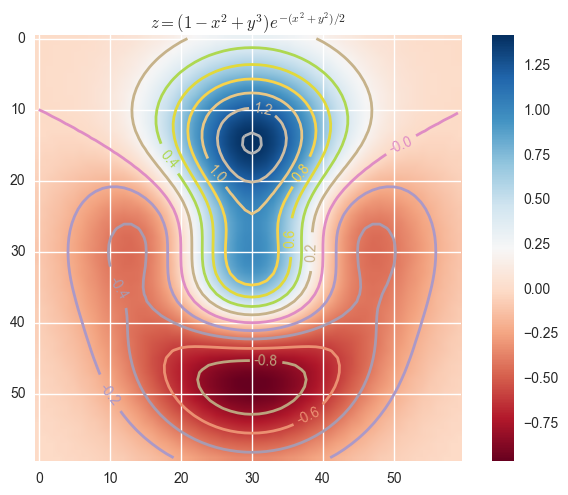

In [116]:
from numpy import exp,arange
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show

# the function that I'm going to plot
def z_func(x,y):
 return (1-(x**2+y**3))*exp(-(x**2+y**2)/2)
 
x = arange(-3.0,3.0,0.1)
y = arange(-3.0,3.0,0.1)
X,Y = meshgrid(x, y) # grid of point
Z = z_func(X, Y) # evaluation of the function on the grid

im = imshow(Z,cmap=cm.RdBu) # drawing the function
# adding the Contour lines with labels
cset = contour(Z,arange(-1,1.5,0.2),linewidths=2,cmap=cm.Set2)
clabel(cset,inline=True,fmt='%1.1f',fontsize=10)
colorbar(im) # adding the colobar on the right
# latex fashion title
title('$z=(1-x^2+y^3) e^{-(x^2+y^2)/2}$')
show()

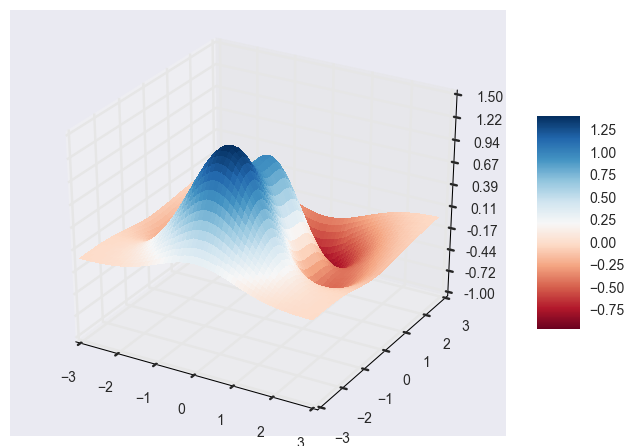

In [121]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                      cmap=cm.RdBu,linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()